<head>
  <meta name="author">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="left"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

# **Regressão Logística**
# Exercício prático
---

In [175]:
#imports necessários
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split #para facilitar a separação dos dados..
from sklearn.linear_model import LogisticRegression  #para configurar o modelo..
from sklearn import metrics                          #para obter métricas de análise..


## Relembrando a estrutura de Modelos de Classificação


```
#Separando variáveis independentes das dependentes
x = df.drop('Y',axis=1)
y = df['Y']

#Separando em treino e Teste (30% para Teste)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

#Declarando o modelo
model = LogisticRegression()

#Treinando o modelo (com o conjunto de Treino)
model.fit(X_train,y_train)

#Utilizando o modelo para prever novos casos
y_pred=model.predict(X_test)

#Visualizando os resultados
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

#Verificando com qual probabilidade os dados foram classificados
y_pred_prob = model.predict_proba(df.drop('Y',axis=1))
```

##CASO: Consumo de combustível em veículos ##

Resumo: Informações sobre o consumo de combustível em veículos, medido em milhas por galão (mpg)

Para descrição completa dos dados acesse https://archive.ics.uci.edu/ml/datasets/auto+mpg.



In [176]:
mpg = sns.load_dataset('mpg')

mpg.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# Questão 1: Qual o tamanho do df? Linhas e Colunas?


In [177]:
print(f"shape dataframe: rows = {mpg.shape[0]} and columns = {mpg.shape[1]}")

shape dataframe: rows = 398 and columns = 9


# Questão 2: Existem valores que devem ser excluídos? Quantos em cada coluna?


In [178]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [179]:
mpg.dropna(subset = ["horsepower"], inplace=True)
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [180]:
print(f"shape dataframe: rows = {mpg.shape[0]} and columns = {mpg.shape[1]}")

shape dataframe: rows = 392 and columns = 9


# Questão 3: Quantas configurações diferentes de cilindros existem?


In [181]:
mpg['cylinders'].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

In [182]:
mpg['cylinders'].value_counts(normalize=True).map('{:.2%}'.format)

4    50.77%
8    26.28%
6    21.17%
3     1.02%
5     0.77%
Name: cylinders, dtype: object

# Questão 4: Qual o percentual de veículos com mpg maior que 25?


In [183]:
cars_mpg = mpg.loc[mpg['mpg'] > 25,'mpg'].count()/mpg['mpg'].count()
cars_mpg

0.3979591836734694

# Questão 5: Quantos veículos foram produzidos nos EUA?

In [184]:
mpg_origin = mpg['origin']

number_vehicles = mpg_origin[mpg_origin == 'usa'].count()
print(f'Number of vehicle produced in USA >>> {number_vehicles}')

Number of vehicle produced in USA >>> 245


### Questão 6: Altere a coluna `origin` de modo que ela represente se um veículo foi ou não produzido nos EUA. Qual a porcentagem de veículos dos EUA?
Dica: utilize:

```
# df.coluna.replace('antigo','novo')
```



In [185]:
mpg_origin.value_counts(normalize=True).map('{:.2%}'.format)


usa       62.50%
japan     20.15%
europe    17.35%
Name: origin, dtype: object

In [186]:
#quantos veículos da base foram produzidos nos EUA e quantos não?


#qual a porcentagem de veículos dos EUA?


### Questão 7: O consumo em mpg e o número de cilindros, conseguem classificar se um veículo foi produzido nos EUA ou não? Crie um modelo de regressão logística capaz de responder essa pergunta?

In [187]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [188]:
# import da ferramenta
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [189]:
X = mpg[['mpg','cylinders']]
y = mpg['origin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)


In [190]:
# Inicializar o modelo com parametros padrão
logreg = LogisticRegression()
logreg.fit(X_train,y_train)


LogisticRegression()

In [191]:
y_pred=logreg.predict(X_test)

# Questão 8: Qual a acurácia do modelo?

In [192]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.75


# Faça a matriz de confusão e analise cada uma das classes. Analise os resultados.

In [193]:
# Assuming you have actual labels (y_true) and predicted labels (y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(confusion)


[[ 0  1  3]
 [ 0  5  4]
 [ 0  2 25]]


# O código abaixo serve para melhorar a visualização da Matriz de Confusão

```
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()
```

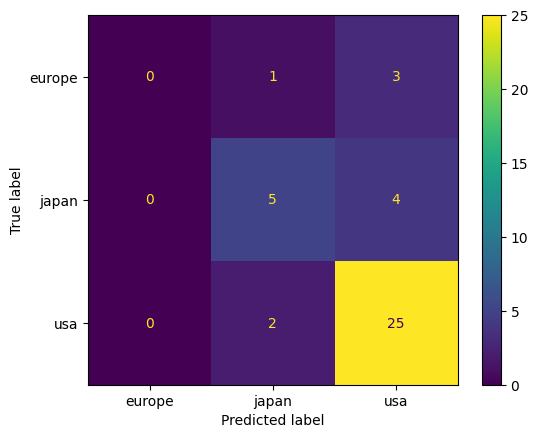

In [194]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logreg.classes_)
disp.plot()

plt.show()

# Questão 9: Agora que você já entende um modelo básico de regressão logística, proceda da seguinte forma:


*   Carregue novamente os dados
*   Exclua os valores nulos
*   Crie uma coluna chamada 'high_efficiency' na qual os valores serão 0 no caso em que o valor de mpg da linha, for maior que a mediana de toda a base e 1 caso contrário.
*   Construa um modelo usando:
  

  

> a) X = X = mpg[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]




> b) y = mpg['high_efficiency']

para prever se a partir das variáveis X é possível prever se o carro é eficiente ou não (y).

Dica: mpg['high_efficiency'] = (mpg['mpg'] > median_mpg).astype(int)

In [195]:
mpg = sns.load_dataset('mpg')

mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [196]:
mpg.dropna(subset = ["horsepower"], inplace=True)
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [197]:
mpg['high_efficiency'] = (mpg['mpg'] > mpg['mpg'].median()).astype(int)

In [198]:
X = mpg[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]

In [199]:
y = mpg['high_efficiency']

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [201]:
# Inicializar o modelo com parametros padrão
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [202]:
y_pred=logreg.predict(X_test)

# Questão 10: Qual a acurácia do modelo? Quantos acertos?

In [203]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.875
